### Dataset Source

This dataset was downloaded from [Kaggle - Music and Mental Health Survey Dataset](https://www.kaggle.com/datasets/catherinerasgaitis/mxmh-survey-results).

The dataset includes features like Age, Primary Streaming Service, Hours per Day, Favorite Genre, Instrumentalist, Composer, Music Effects, and mental health indicators such as Anxiety, Depression, Insomnia, and OCD.


## Goals / Objectives

- Investigate the relationship between music listening habits and mental health indicators such as anxiety, depression, insomnia, and OCD.

- Understand how preferred music genres and streaming platforms relate to emotional well-being.

- Examine the impact of listening duration, music exploration, and usage behavior while working on mental health.

- Compare mental health scores across different listener types.

- Apply statistical methods (t-test, chi-square, correlation) to identify significant patterns or associations.

- Visualize trends in the data and support insights with meaningful observations.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv("music_and_mental_health.csv")
df.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],Frequency [Gospel],Frequency [Hip hop],Frequency [Jazz],Frequency [K pop],Frequency [Latin],Frequency [Lofi],Frequency [Metal],Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,156.0,Rarely,Never,Rarely,Never,Never,Sometimes,Never,Very frequently,Very frequently,Rarely,Never,Very frequently,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,119.0,Sometimes,Never,Never,Rarely,Sometimes,Rarely,Very frequently,Rarely,Sometimes,Rarely,Never,Sometimes,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,132.0,Never,Never,Very frequently,Never,Never,Rarely,Rarely,Very frequently,Never,Sometimes,Sometimes,Rarely,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,84.0,Sometimes,Never,Never,Rarely,Sometimes,Never,Very frequently,Sometimes,Very frequently,Sometimes,Never,Sometimes,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,107.0,Never,Never,Rarely,Never,Rarely,Very frequently,Never,Very frequently,Sometimes,Sometimes,Never,Sometimes,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


## Explore Data

In [4]:
df.shape

(736, 33)

Dataset have 736 rows and 33 columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     736 non-null    object 
 1   Age                           735 non-null    float64
 2   Primary streaming service     735 non-null    object 
 3   Hours per day                 736 non-null    float64
 4   While working                 733 non-null    object 
 5   Instrumentalist               732 non-null    object 
 6   Composer                      735 non-null    object 
 7   Fav genre                     736 non-null    object 
 8   Exploratory                   736 non-null    object 
 9   Foreign languages             732 non-null    object 
 10  BPM                           629 non-null    float64
 11  Frequency [Classical]         736 non-null    object 
 12  Frequency [Country]           736 non-null    object 
 13  Frequ

In [6]:
df.describe(include = 'all')

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],Frequency [Gospel],Frequency [Hip hop],Frequency [Jazz],Frequency [K pop],Frequency [Latin],Frequency [Lofi],Frequency [Metal],Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
count,736,735.000000,735,736.000000,733,732,735,736,736,732,6.290000e+02,736,736,736,736,736,736,736,736,736,736,736,736,736,736,736,736,736.000000,736.000000,736.000000,736.000000,728,736
unique,735,NaN,6,NaN,2,2,2,16,2,2,NaN,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,NaN,NaN,NaN,NaN,3,1
top,8/28/2022 16:15:08,NaN,Spotify,NaN,Yes,No,No,Rock,Yes,Yes,NaN,Rarely,Never,Never,Never,Never,Sometimes,Never,Never,Never,Never,Never,Very frequently,Never,Rarely,Very frequently,Never,NaN,NaN,NaN,NaN,Improve,I understand.
freq,2,NaN,458,NaN,579,497,609,188,525,404,NaN,259,343,307,292,535,218,261,416,443,280,264,277,225,215,330,236,NaN,NaN,NaN,NaN,542,736
mean,NaN,25.206803,NaN,3.572758,NaN,NaN,NaN,NaN,NaN,NaN,1.589948e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.837636,4.796196,3.738451,2.637228,NaN,NaN
std,NaN,12.054970,NaN,3.028199,NaN,NaN,NaN,NaN,NaN,NaN,3.987261e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.793054,3.028870,3.088689,2.842017,NaN,NaN
min,NaN,10.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,NaN,18.000000,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,2.000000,1.000000,0.000000,NaN,NaN
50%,NaN,21.000000,NaN,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.200000e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,5.000000,3.000000,2.000000,NaN,NaN
75%,NaN,28.000000,NaN,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.440000e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.000000,7.000000,6.000000,5.000000,NaN,NaN


In [7]:
df.columns

Index(['Timestamp', 'Age', 'Primary streaming service', 'Hours per day',
       'While working', 'Instrumentalist', 'Composer', 'Fav genre',
       'Exploratory', 'Foreign languages', 'BPM', 'Frequency [Classical]',
       'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]',
       'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]',
       'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]',
       'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]',
       'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]',
       'Anxiety', 'Depression', 'Insomnia', 'OCD', 'Music effects',
       'Permissions'],
      dtype='object')

In [8]:
# Missing Percent Value
round((df.isnull().sum() / len(df) * 100), 2)

Timestamp                        0.00
Age                              0.14
Primary streaming service        0.14
Hours per day                    0.00
While working                    0.41
Instrumentalist                  0.54
Composer                         0.14
Fav genre                        0.00
Exploratory                      0.00
Foreign languages                0.54
BPM                             14.54
Frequency [Classical]            0.00
Frequency [Country]              0.00
Frequency [EDM]                  0.00
Frequency [Folk]                 0.00
Frequency [Gospel]               0.00
Frequency [Hip hop]              0.00
Frequency [Jazz]                 0.00
Frequency [K pop]                0.00
Frequency [Latin]                0.00
Frequency [Lofi]                 0.00
Frequency [Metal]                0.00
Frequency [Pop]                  0.00
Frequency [R&B]                  0.00
Frequency [Rap]                  0.00
Frequency [Rock]                 0.00
Frequency [V

## Data Cleaning

In [9]:
df.Age.value_counts()

Age
18.0    85
19.0    61
17.0    59
21.0    52
16.0    44
20.0    40
22.0    39
23.0    37
26.0    22
25.0    22
15.0    21
24.0    20
27.0    18
14.0    17
32.0    16
29.0    13
28.0    13
31.0    13
30.0    11
34.0     8
13.0     8
33.0     8
35.0     7
36.0     7
42.0     6
60.0     6
38.0     6
56.0     5
37.0     5
49.0     5
40.0     5
43.0     4
41.0     4
67.0     3
58.0     3
57.0     3
12.0     3
53.0     3
64.0     3
44.0     3
63.0     3
59.0     2
54.0     2
61.0     2
48.0     2
74.0     1
46.0     1
68.0     1
50.0     1
80.0     1
65.0     1
51.0     1
70.0     1
71.0     1
55.0     1
10.0     1
39.0     1
73.0     1
72.0     1
69.0     1
89.0     1
Name: count, dtype: int64

In [10]:
df.Age.fillna(df.Age.median(), inplace=True)

In [11]:
df['Primary streaming service'].value_counts()

Primary streaming service
Spotify                              458
YouTube Music                         94
I do not use a streaming service.     71
Apple Music                           51
Other streaming service               50
Pandora                               11
Name: count, dtype: int64

In [12]:
df['Primary streaming service'].fillna(df['Primary streaming service'].mode()[0], inplace=True)

In [13]:
df['Primary streaming service'] = df['Primary streaming service'].replace({
    'I do not use a streaming service.': 'No Streaming Service',
    'Other streaming service': 'Other'
})

In [14]:
df['While working'].value_counts()

While working
Yes    579
No     154
Name: count, dtype: int64

In [15]:
df['While working'].fillna(df['While working'].mode()[0], inplace = True)

In [16]:
df['Instrumentalist'].value_counts()

Instrumentalist
No     497
Yes    235
Name: count, dtype: int64

In [17]:
df['Instrumentalist'].fillna(df['Instrumentalist'].mode()[0], inplace=True)

In [18]:
df['Composer'].value_counts()

Composer
No     609
Yes    126
Name: count, dtype: int64

In [19]:
df['Composer'].fillna(df['Composer'].mode()[0],inplace=True)

In [20]:
df['Foreign languages'].value_counts()

Foreign languages
Yes    404
No     328
Name: count, dtype: int64

In [21]:
df['Foreign languages'].fillna(df['Foreign languages'].mode()[0], inplace=True)

In [22]:
df['Music effects'].value_counts()

Music effects
Improve      542
No effect    169
Worsen        17
Name: count, dtype: int64

In [23]:
df['Music effects'].fillna(df['Music effects'].mode()[0], inplace=True)

In [24]:
df['BPM'].value_counts().sort_index()

BPM
0.0             3
4.0             1
8.0             1
20.0            1
40.0            1
52.0            1
55.0            2
56.0            1
60.0            2
61.0            1
62.0            1
63.0            1
66.0            3
68.0            1
70.0            3
72.0            5
73.0            2
75.0            3
76.0            3
77.0            5
78.0            3
79.0            3
80.0           11
81.0            4
82.0            1
84.0            5
85.0            9
86.0            4
87.0            3
88.0            2
89.0            6
90.0           11
91.0            5
92.0            7
93.0            7
94.0            4
95.0           10
96.0            4
97.0            6
98.0            5
99.0            4
100.0          11
101.0           4
102.0           2
103.0           6
104.0           3
105.0          15
106.0           1
107.0           5
108.0           7
109.0           5
110.0          16
111.0           2
112.0           8
113.0           8
114.0 

In [25]:
df['BPM'].fillna(df['BPM'].median(), inplace=True)

In [26]:
df = df[df['BPM'] < 300]
df = df[df['BPM'] > 30]

In [27]:
df.shape

(728, 33)

In [28]:
df.isnull().sum() / len(df) * 100

Timestamp                       0.0
Age                             0.0
Primary streaming service       0.0
Hours per day                   0.0
While working                   0.0
Instrumentalist                 0.0
Composer                        0.0
Fav genre                       0.0
Exploratory                     0.0
Foreign languages               0.0
BPM                             0.0
Frequency [Classical]           0.0
Frequency [Country]             0.0
Frequency [EDM]                 0.0
Frequency [Folk]                0.0
Frequency [Gospel]              0.0
Frequency [Hip hop]             0.0
Frequency [Jazz]                0.0
Frequency [K pop]               0.0
Frequency [Latin]               0.0
Frequency [Lofi]                0.0
Frequency [Metal]               0.0
Frequency [Pop]                 0.0
Frequency [R&B]                 0.0
Frequency [Rap]                 0.0
Frequency [Rock]                0.0
Frequency [Video game music]    0.0
Anxiety                     

## EDA

Text(0.5, 1.0, 'Age Distribution')

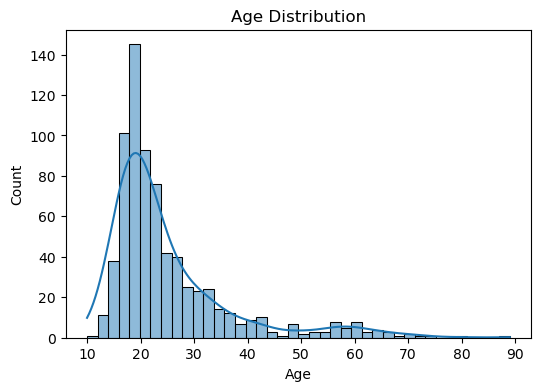

In [29]:
## Age
plt.figure(figsize = (6,4))
sns.histplot(df['Age'], kde = True)
plt.title('Age Distribution')

Most respondents are young, with the majority aged between 18 and 25. The distribution is right-skewed, indicating fewer participants in older age groups.

Text(0.5, 1.0, 'Hours Per Day Distribution')

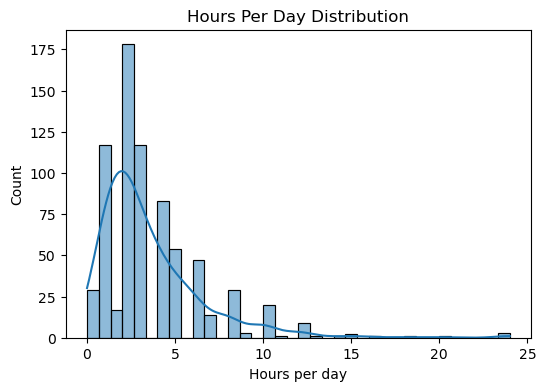

In [30]:
# Hours Per Day
plt.figure(figsize = (6,4))
sns.histplot(df['Hours per day'], kde = True)
plt.title('Hours Per Day Distribution')

Most respondents spend 1 to 5 hours per day, with a peak around 2–3 hours. The distribution is right-skewed, indicating fewer people spend long hours daily.

Text(0.5, 1.0, 'BPM Distribution')

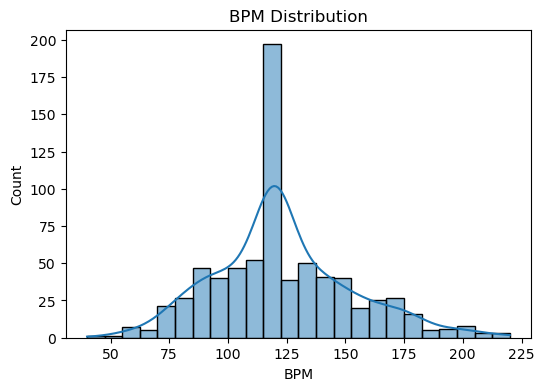

In [31]:
# BPM
plt.figure(figsize = (6,4))
sns.histplot(df['BPM'], kde = True)
plt.title('BPM Distribution')

Most tracks have a BPM around 120, with the distribution showing a sharp peak at that value. The overall shape is approximately normal but with a noticeable concentration at 120 BPM, indicating it's a common tempo in music.

Text(0.5, 0, 'Anxiety Score (0–10)')

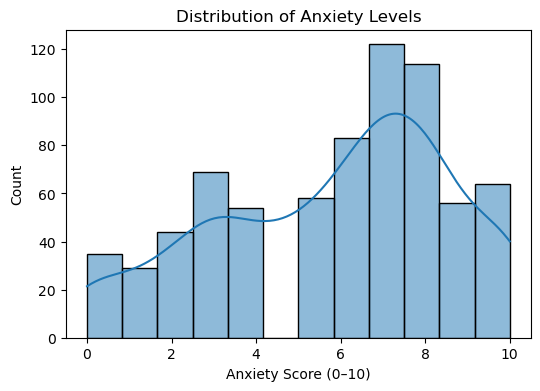

In [32]:
# Anxiety Score
plt.figure(figsize = (6,4))
sns.histplot(df['Anxiety'], kde=True)
plt.title('Distribution of Anxiety Levels')
plt.xlabel('Anxiety Score (0–10)')

Anxiety levels are skewed towards the higher end, with most individuals scoring between 6 and 8. This suggests that moderate to high anxiety is more common among the participants.

Text(0.5, 0, 'Depression Score (0–10)')

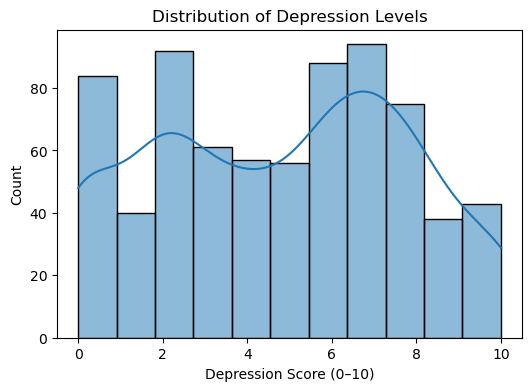

In [33]:
# Depression Score
plt.figure(figsize = (6,4))
sns.histplot(df['Depression'], kde=True)
plt.title('Distribution of Depression Levels')
plt.xlabel('Depression Score (0–10)')

Depression scores are fairly evenly distributed, with a slight increase in counts around scores 2 and 7. This indicates a wide variation in depression levels among participants, without a strong concentration in any single range.

Text(0.5, 0, 'Insomnia Score (0–10)')

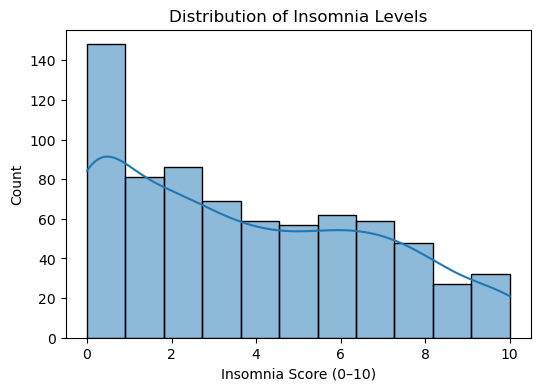

In [34]:
# Insomnia Score
plt.figure(figsize = (6,4))
sns.histplot(df['Insomnia'], kde=True)
plt.title('Distribution of Insomnia Levels')
plt.xlabel('Insomnia Score (0–10)')

Most participants have low insomnia scores, with the count decreasing as the scores increase. The distribution is right-skewed, indicating that high levels of insomnia are less common.

Text(0.5, 0, 'OCD Score (0–10)')

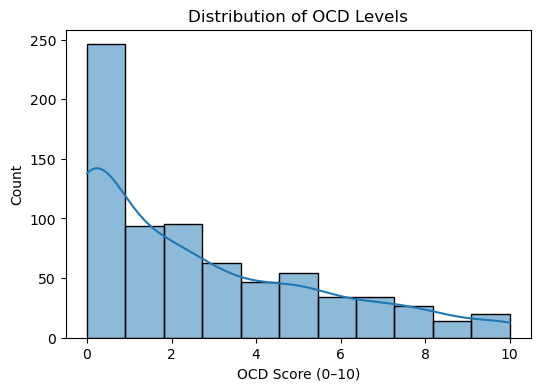

In [35]:
# OCD Score
plt.figure(figsize = (6,4))
sns.histplot(df['OCD'], kde=True)
plt.title('Distribution of OCD Levels')
plt.xlabel('OCD Score (0–10)')

OCD scores are strongly right-skewed, with most participants scoring between 0 and 2. Higher OCD scores are increasingly rare, suggesting that severe OCD symptoms are less common in the dataset.

Text(0.5, 1.0, 'Preferred Music Streaming Services')

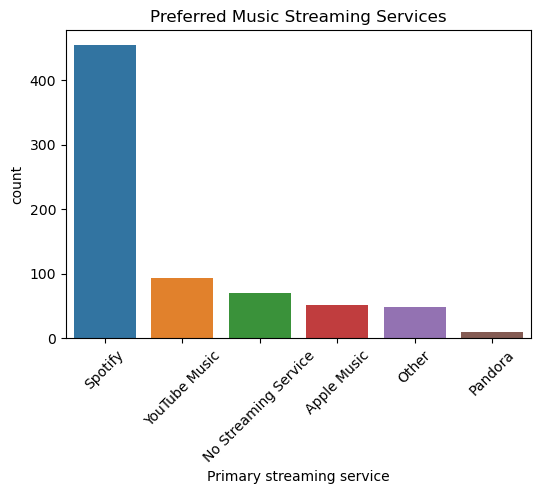

In [36]:
# Preferred Music Streaming Services
plt.figure(figsize = (6,4))
sns.countplot(data=df, x='Primary streaming service', order=df['Primary streaming service'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Preferred Music Streaming Services')

Spotify is the most preferred streaming service by a large margin. Other platforms like YouTube Music, Apple Music, and Others have significantly fewer users, with Pandora being the least used.

Text(0.5, 1.0, 'Favorite Music Genres')

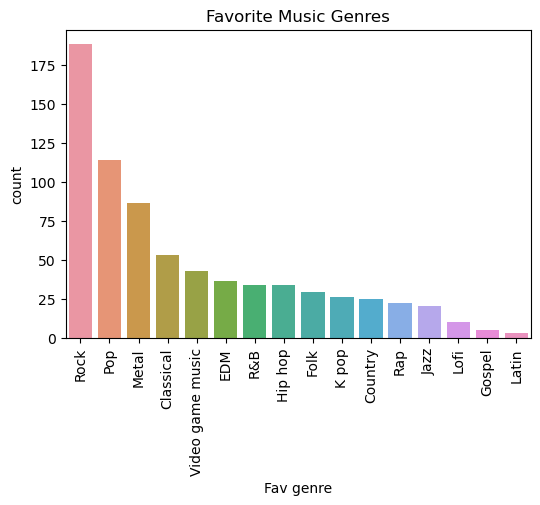

In [37]:
# Favorite Music Genres
plt.figure(figsize = (6,4))
sns.countplot(data=df, x='Fav genre', order=df['Fav genre'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Favorite Music Genres')

Rock is the most preferred genre, followed by Pop and Metal. Genres like Jazz, Lofi, Gospel, and Latin have the fewest listeners, showing a clear preference for energetic music styles.

Text(0.5, 1.0, 'Distribution of Listening to Music While Working')

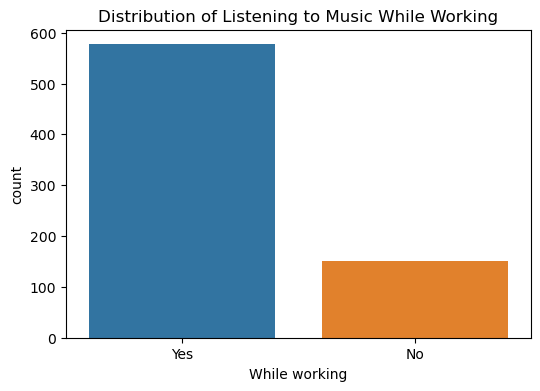

In [38]:
# While working
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='While working')
plt.title('Distribution of Listening to Music While Working')

The majority of respondents over 75% listen to music while working, indicating a strong preference for using music as a background during tasks.

Text(0.5, 1.0, 'Are You an Instrumentalist?')

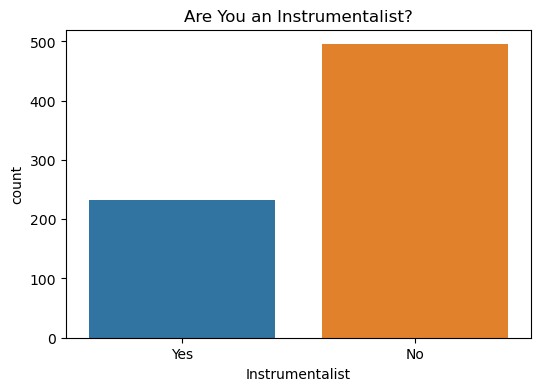

In [39]:
# Instrumentalist
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Instrumentalist')
plt.title('Are You an Instrumentalist?')

Most participants are not instrumentalists, with nearly twice as many responding No compared to those who play an instrument.

Text(0.5, 0, 'Response')

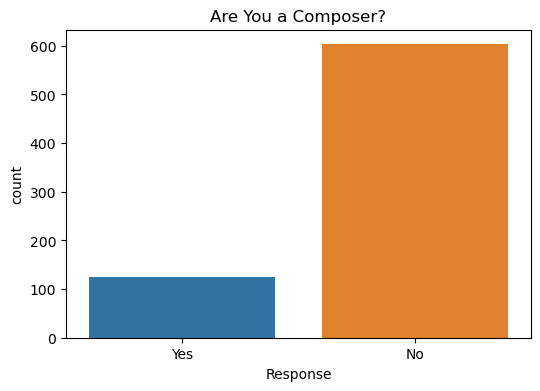

In [40]:
# Composer
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Composer')
plt.title('Are You a Composer?')
plt.xlabel('Response')

A large majority of participants do not compose music, with only a small portion identifying as composers.

Text(0.5, 0, 'Response')

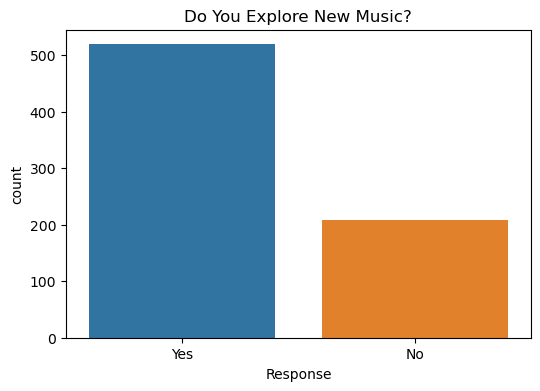

In [41]:
# Exploratory
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Exploratory')
plt.title('Do You Explore New Music?')
plt.xlabel('Response')

The majority of participants actively explore new music, suggesting a strong interest in musical discovery.

Text(0.5, 0, 'Response')

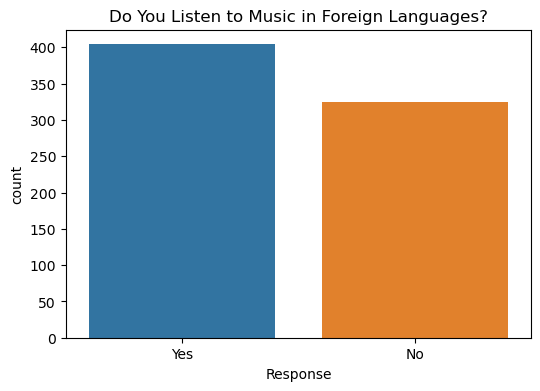

In [42]:
# Foreign languages
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Foreign languages')
plt.title('Do You Listen to Music in Foreign Languages?')
plt.xlabel('Response')

A majority of participants listen to music in foreign languages, though a significant portion still prefers music in their native language.

Text(0.5, 0, 'Effect')

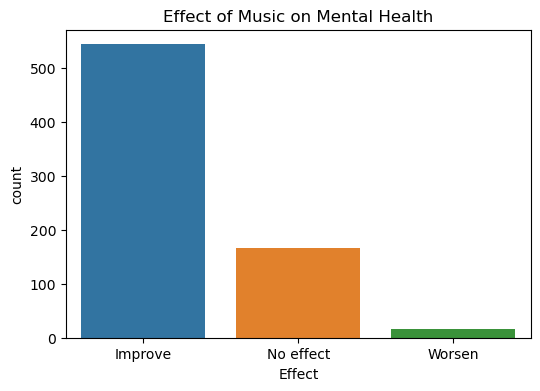

In [43]:
# Music effects
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Music effects', order=df['Music effects'].value_counts().index)
plt.title('Effect of Music on Mental Health')
plt.xlabel('Effect')

Most participants believe that music improves their mental health, while fewer report no effect, and only a very small number feel that it worsens their mental well-being.

### Bivariate Analysis

Text(0, 0.5, 'Anxiety Score')

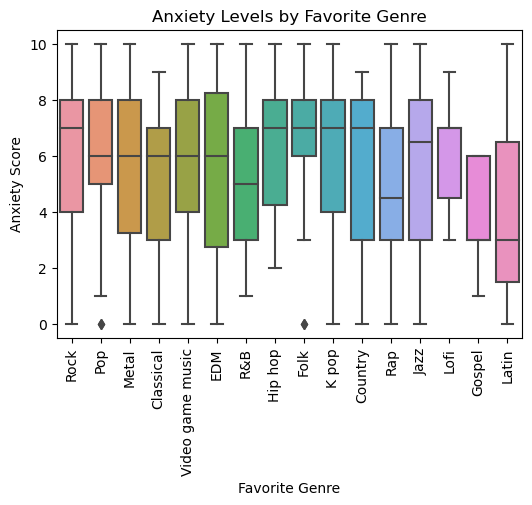

In [44]:
# Anxiety Levels by Favorite Genre
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='Fav genre', y='Anxiety', order=df['Fav genre'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Anxiety Levels by Favorite Genre')
plt.xlabel('Favorite Genre')
plt.ylabel('Anxiety Score')

Lo‑fi and Gospel listeners report the lowest median anxiety (around 4), while Rap and Classical fans show the highest (around 7–8), with most other genres clustered mid‑range (5–6)

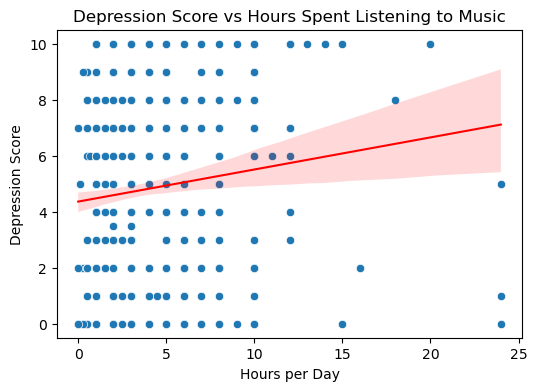

In [45]:
# Depression Score vs Hours Spent Listening to Music
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='Hours per day', y='Depression')
sns.regplot(data=df, x='Hours per day', y='Depression', scatter=False, color='red', line_kws={'linewidth':1.5})
plt.title('Depression Score vs Hours Spent Listening to Music')
plt.xlabel('Hours per Day')
plt.ylabel('Depression Score')
plt.show()


There is a slight positive trend participants who spend more hours listening to music tend to report marginally higher depression scores, though the spread suggests the relationship is weak.

Text(0, 0.5, 'Anxiety Score')

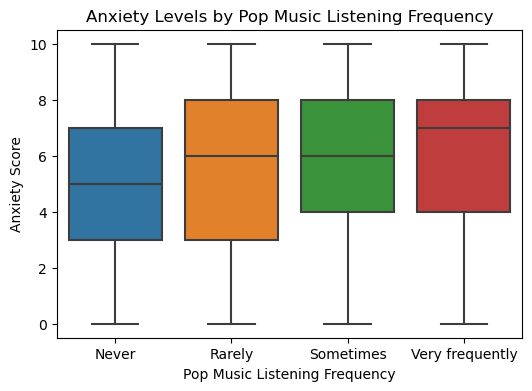

In [46]:
# Anxiety Levels by Pop Music Listening Frequency
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='Frequency [Pop]', y='Anxiety', order=['Never', 'Rarely', 'Sometimes', 'Very frequently'])
plt.title('Anxiety Levels by Pop Music Listening Frequency')
plt.xlabel('Pop Music Listening Frequency')
plt.ylabel('Anxiety Score')


Anxiety rises with pop‑music frequency. "Never" listeners have median of 5, "Rarely and Sometimes" at 6, and "Very frequently" at 7, showing a clear upward trend as listening increases.

Text(0, 0.5, 'OCD Score')

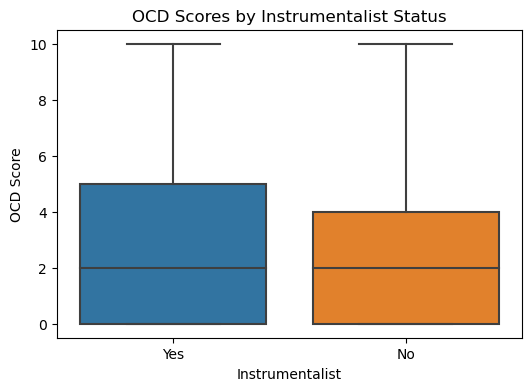

In [47]:
# OCD Scores by Instrumentalist Status
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='Instrumentalist', y='OCD')
plt.title('OCD Scores by Instrumentalist Status')
plt.xlabel('Instrumentalist')
plt.ylabel('OCD Score')

Median OCD scores are the same 2 for both instrumentalists and non‑instrumentalists, and their overall distributions look very similar with only a slightly wider spread among instrumentalists.

Text(0, 0.5, 'Depression Score')

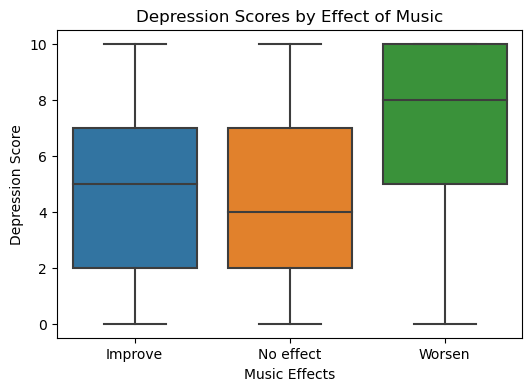

In [48]:
# Depression Scores by Effect of Music
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='Music effects', y='Depression', order=['Improve', 'No effect', 'Worsen'])
plt.title('Depression Scores by Effect of Music')
plt.xlabel('Music Effects')
plt.ylabel('Depression Score')

Participants who say music worsens their mood have the highest depression scores median of 8, those reporting no effect have the lowest median of 4, and the improve group have median of 5.

Text(0, 0.5, 'Anxiety Score')

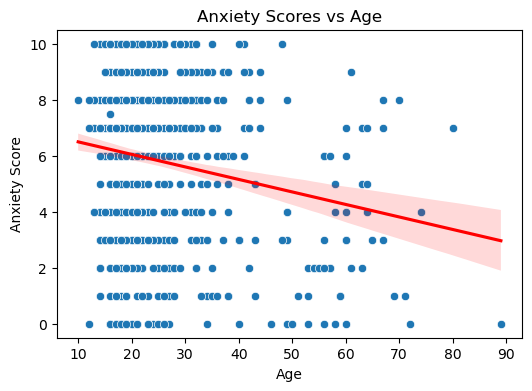

In [49]:
# Anxiety Scores vs Age
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='Age', y='Anxiety')
sns.regplot(data=df, x='Age', y='Anxiety', scatter=False, color='red')
plt.title('Anxiety Scores vs Age')
plt.xlabel('Age')
plt.ylabel('Anxiety Score')

There's a mild negative trend: as age increases, reported anxiety scores tend to decrease, with younger participants showing higher anxiety on average.

Text(0, 0.5, 'Insomnia Score')

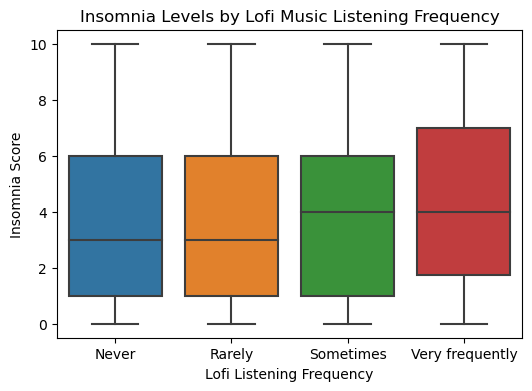

In [50]:
# Insomnia vs Frequency [Lofi]
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='Frequency [Lofi]', y='Insomnia', order=['Never', 'Rarely', 'Sometimes', 'Very frequently'])
plt.title('Insomnia Levels by Lofi Music Listening Frequency')
plt.xlabel('Lofi Listening Frequency')
plt.ylabel('Insomnia Score')

Insomnia scores climb modestly with more lo‑fi listening: medians sit around 3 for Never and Rarely rising to about 4 for Sometimes and Very frequently.

### Multivariate Analysis

Text(0.5, 1.0, 'Correlation Heatmap of Numerical Features')

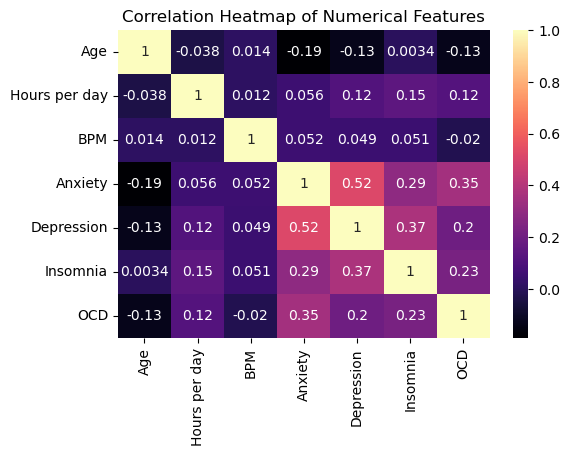

In [51]:
plt.figure(figsize=(6, 4))
sns.heatmap(df[['Age', 'Hours per day', 'BPM', 'Anxiety', 'Depression', 'Insomnia', 'OCD']].corr(), annot=True, cmap='magma')
plt.title('Correlation Heatmap of Numerical Features')

Anxiety and depression show the strongest connection of 0.52. Depression also has a moderate link with insomnia of 0.37 and OCD have 0.20, while OCD is moderately associated with anxiety of 0.35. All other variables like age, hours per day, and BPM have only very weak correlations less than 0.2.

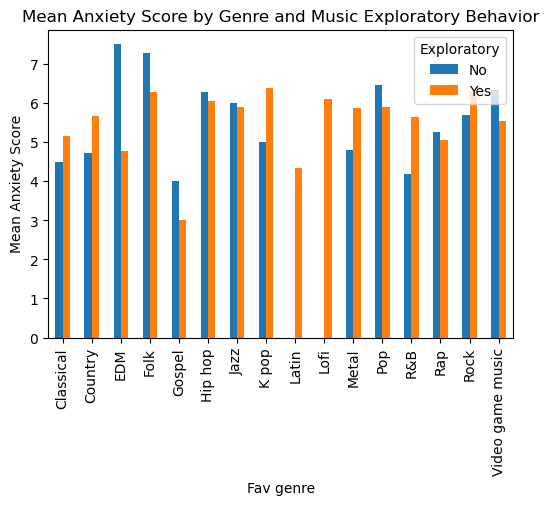

In [52]:
df.groupby(['Fav genre', 'Exploratory'])['Anxiety'].mean().unstack().plot(kind='bar', figsize=(6, 4))
plt.title('Mean Anxiety Score by Genre and Music Exploratory Behavior')
plt.ylabel('Mean Anxiety Score')
plt.xticks(rotation=90)
plt.show()

Across most genres, individuals who explore new music tend to report lower anxiety scores compared to those who do not. This pattern is especially noticeable in genres like EDM, Hip hop, and Metal, suggesting that exploratory music behavior may be linked to better emotional regulation.

### Statical Analysis

In [53]:
# T-Test for Exploratory vs Anxiety
from scipy.stats import ttest_ind
explore_yes = df[df['Exploratory'] == 'Yes']['Anxiety']
explore_no = df[df['Exploratory'] == 'No']['Anxiety']

In [54]:
t_stat, p_value = ttest_ind(explore_yes, explore_no, equal_var=False)  # Welch's t-test
print(f"T-statistic: {t_stat:.2f}, P-value: {p_value:.2f}")

T-statistic: 0.69, P-value: 0.49


The t-test shows no statistically significant difference in anxiety levels between individuals who explore new music and those who do not. This suggests that exploratory behavior in music may not have a meaningful impact on anxiety in this dataset.

In [55]:
# Chi Square test – Instrumentalist vs Music Effects
from scipy.stats import chi2_contingency
table = pd.crosstab(df['Instrumentalist'], df['Music effects'])
table

Music effects,Improve,No effect,Worsen
Instrumentalist,,,
No,354,128,13
Yes,190,39,4


In [56]:
chi2, p, dof, expected = chi2_contingency(table)
print(f"Chi2: {chi2:.2f}, P-value: {p:.2f}")

Chi2: 8.44, P-value: 0.01


The chi-square test shows a significant connection between being an instrumentalist and how people think music affects their mental health. This means that people who play instruments may feel the effect of music differently than those who don't.

In [57]:
# Correlation – Hours per Day vs Anxiety
correlation = df['Hours per day'].corr(df['Anxiety'])
print(f"Correlation: {correlation:.4f}")

Correlation: 0.0564


There is a very weak positive correlation between hours spent listening to music and anxiety levels, meaning listening longer has almost no effect on anxiety in this dataset.

## Conclusion
The analysis shows that most young respondents listen to music daily, mainly via Spotify, favoring energetic genres. Mental health scores vary, with high anxiety being common. While exploratory behavior and listening time show little impact on anxiety, genre and perception play a stronger role. Significant links were found between being an instrumentalist and perceived music effects, and between anxiety and depression. Overall, music influences mood, but its impact depends more on personal factors than listening habits alone.